In [ ]:
#rebo cloning
!git clone https://github.com/MohamedMeksi/Dataset-genAI.git

# explore the files
%cd Dataset-genAI

# listing the files
!ls

Cloning into 'Dataset-genAI'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 21 (delta 2), reused 21 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 90.17 KiB | 4.10 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Dataset-genAI
'Deep Learning'      'Logistic Regression'   README.md
'Linear Regression'  'Random Forest'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#cping the files to drive
!cp -r /content/Dataset-genAI /content/drive/MyDrive/hr_ai_project_ByZ/

Mounted at /content/drive


# **1. Job Fit Prediction Model**

**Purpose:** Determines if a candidate is a good fit for a specific job


**Input:** Required skills, candidate skills, degree, years of experience

**Output:** Probability score (0-1) and binary fit decision

**Algorithm:** Logistic Regression with TF-IDF skill matching

**Use Case:** "Is this candidate suitable for our DevOps position?"

In [ ]:
import pandas as pd
#accéder au file contenant data
JobFitDF = pd.read_csv("/content/Dataset-genAI/Logistic Regression/job_fit_1000.csv")

In [ ]:
print(JobFitDF.shape)
JobFitDF.head()

(1000, 9)


,id,required_skills,candidate_skills,degree,years_experience,overlap,fit,probability,missing_skills
0,FIT0000,"Docker, Excel, Linux, R, REST, TensorFlow","AWS, Airflow, ETL, Hadoop, TypeScript",Masters,0.9,0.0,0.0,0.237,"Docker, Excel, Linux, R, REST, TensorFlow"
1,FIT0001,"CI/CD, Docker, Flask, JavaScript, Kubernetes, ...","Kubernetes, NumPy, Python, Spark",Masters,1.9,2.0,1.0,0.467,"CI/CD, Docker, Flask, JavaScript, Node.js, React"
2,FIT0002,"Django, Node.js, PyTorch, React, SQL, TensorFlow","Django, Git, Kubernetes, Node.js, NumPy, React...",Masters,2.5,3.0,1.0,0.585,"PyTorch, SQL, TensorFlow"
3,FIT0003,"Docker, ETL, Flask, Python, REST, TensorFlow, ...","AWS, Excel, Hadoop, PyTorch, R",Bachelors,2.7,0.0,0.0,0.231,"Docker, ETL, Flask, Python, REST, TensorFlow, ..."
4,FIT0004,"Airflow, Docker, Kubernetes, Pandas, R","Docker, GraphQL, PyTorch, REST, SQL",Bachelors,4.9,1.0,1.0,0.397,"Airflow, Kubernetes, Pandas, R"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

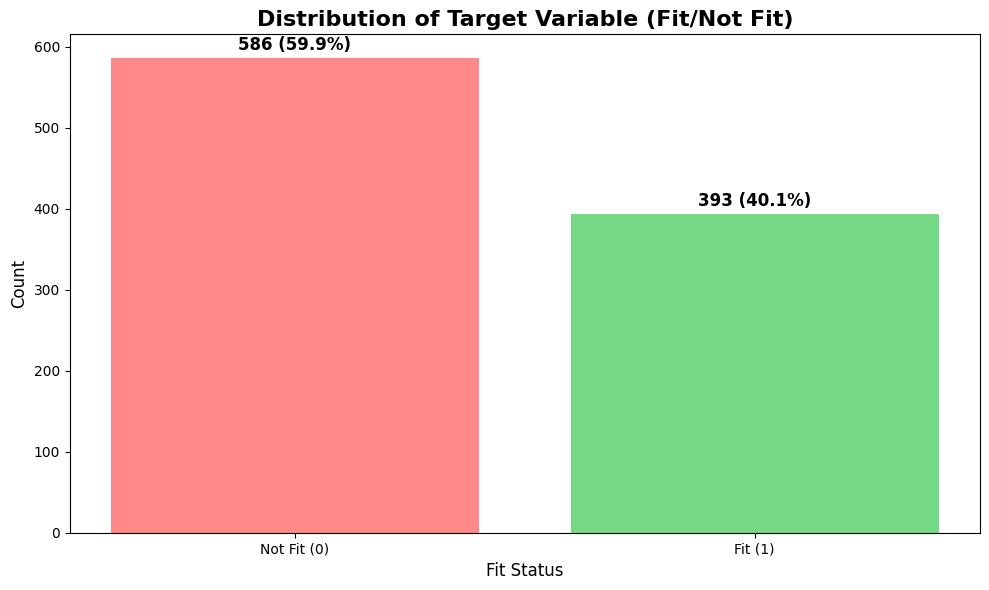

Class imbalance: 59.9% vs 40.1%


In [ ]:
# 1. Target Variable Distribution
plt.figure(figsize=(10, 6))
fit_counts = JobFitDF['fit'].value_counts()
plt.bar(['Not Fit (0)', 'Fit (1)'], fit_counts.values,
        color=['#ff6b6b', '#51cf66'], alpha=0.8)
plt.title('Distribution of Target Variable (Fit/Not Fit)', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Fit Status', fontsize=12)

# Add percentage labels
total = len(JobFitDF)
for i, count in enumerate(fit_counts.values):
    plt.text(i, count + 10, f'{count} ({count/total*100:.1f}%)',
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class imbalance: {fit_counts[0]/total*100:.1f}% vs {fit_counts[1]/total*100:.1f}%")

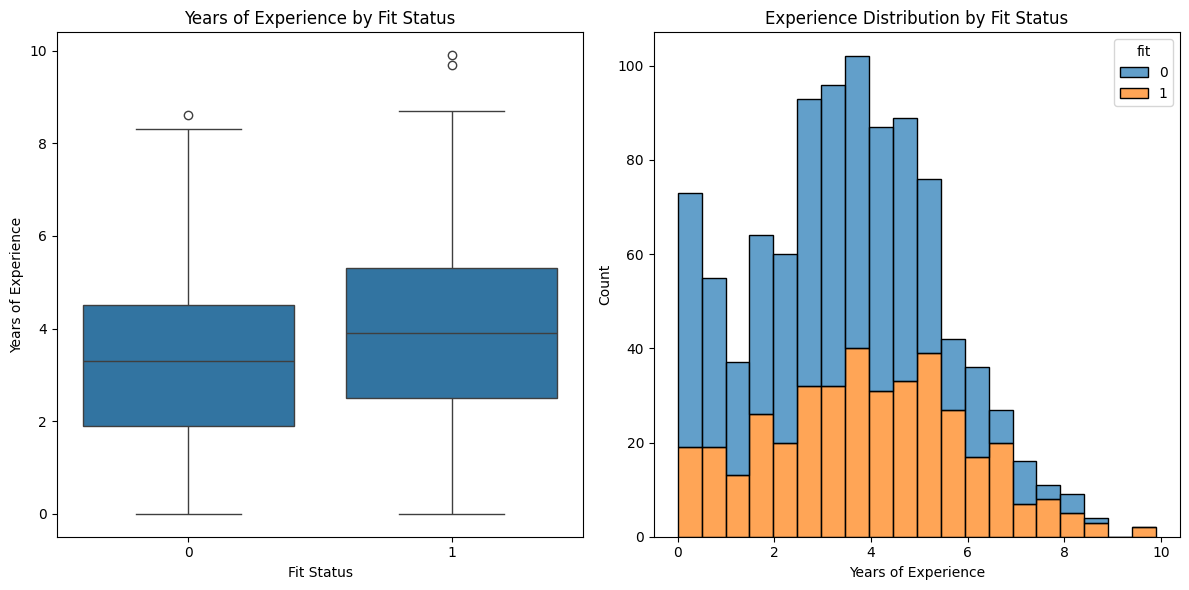

Experience summary by fit status:
     count      mean       std  min  25%  50%  75%  max
fit                                                    
0    586.0  3.213823  1.858663  0.0  1.9  3.3  4.5  8.6
1    393.0  3.901272  2.059850  0.0  2.5  3.9  5.3  9.9


In [ ]:
import seaborn as sns
# 2. Experience Distribution by Fit Status
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='fit', y='years_experience', data=JobFitDF)
plt.title('Years of Experience by Fit Status')
plt.xlabel('Fit Status')
plt.ylabel('Years of Experience')

plt.subplot(1, 2, 2)
sns.histplot(data=JobFitDF, x='years_experience', hue='fit',
             multiple='stack', bins=20, alpha=0.7)
plt.title('Experience Distribution by Fit Status')
plt.xlabel('Years of Experience')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Statistical summary
print("Experience summary by fit status:")
print(JobFitDF.groupby('fit')['years_experience'].describe())

<Figure size 1200x500 with 0 Axes>

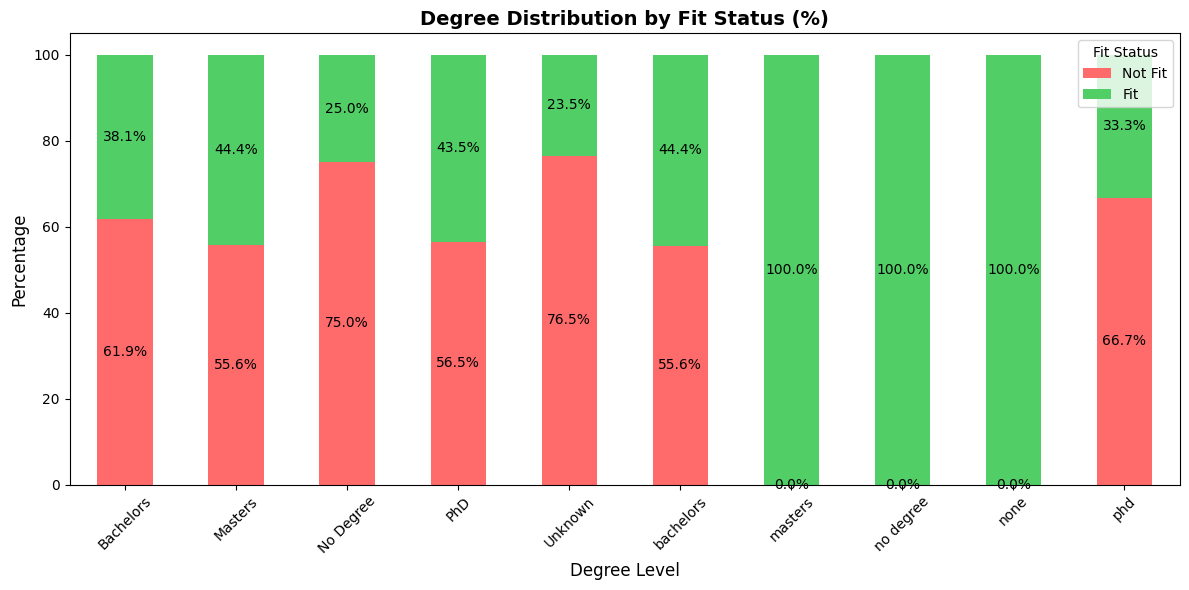

In [ ]:
# 3. Degree Distribution by Fit Status
plt.figure(figsize=(12, 5))
degree_fit = pd.crosstab(JobFitDF['degree'], JobFitDF['fit'], normalize='index') * 100

ax = degree_fit.plot(kind='bar', stacked=True, figsize=(12, 6),
                     color=['#ff6b6b', '#51cf66'])
plt.title('Degree Distribution by Fit Status (%)', fontsize=14, fontweight='bold')
plt.xlabel('Degree Level', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(['Not Fit', 'Fit'], title='Fit Status')
plt.xticks(rotation=45)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

plt.tight_layout()
plt.show()

**1.1. Preprocessing**

-Convert skills text (required_skills, candidate_skills) → numerical features using TF-IDF or CountVectorizer.

-Encode degree (e.g., Bachelor, Master, PhD) → one-hot encoding.

-Normalize years_experience.








In [ ]:
# basic NA handling
JobFitDF['required_skills']  = JobFitDF['required_skills'].fillna('')
JobFitDF['candidate_skills'] = JobFitDF['candidate_skills'].fillna('')
JobFitDF['degree']           = JobFitDF['degree'].fillna('Unknown')
JobFitDF['years_experience'] = JobFitDF['years_experience'].fillna(0.0)

**1) Clean / normalize skills text**

Goal: convert "Docker, Kubernetes, Python" → "docker kubernetes python" (tokens separated by spaces for vectorizers). Also handle special tokens like C++ or C#.

In [ ]:
import re
def normalize_skill_text(s):
    # map problematic tokens (optional)
    s = s.replace("C++", "cplusplus").replace("C#", "csharp")
    # split on common separators and lowercase
    tokens = re.split(r'[,;/|\n]+', str(s))
    tokens = [t.strip().lower() for t in tokens if t.strip()]
    # remove duplicates while preserving order
    seen = set()
    uniq = []
    for t in tokens:
        if t not in seen:
            seen.add(t)
            uniq.append(t)
    return " ".join(uniq)

JobFitDF['req_clean']  = JobFitDF['required_skills'].apply(normalize_skill_text)
JobFitDF['cand_clean'] = JobFitDF['candidate_skills'].apply(normalize_skill_text)
JobFitDF['skills_combined'] = (JobFitDF['req_clean'] + " " + JobFitDF['cand_clean']).str.strip()


**2) Extra skill features: overlap & missing count (useful numeric features)**

In [ ]:
def overlap_info(req, cand):
    req_set = set(req.split()) if req else set()
    cand_set = set(cand.split()) if cand else set()
    overlap_count = len(req_set & cand_set)
    overlap_ratio = overlap_count / len(req_set) if len(req_set) > 0 else 0.0
    missing_set = req_set - cand_set
    return overlap_count, overlap_ratio, len(missing_set), ", ".join(sorted(missing_set))

JobFitDF[['overlap_count','overlap_ratio','missing_count','missing_skills_calc']] = \
    JobFitDF.apply(lambda r: pd.Series(overlap_info(r['req_clean'], r['cand_clean'])), axis=1)


In [ ]:
#hna kaynin 2 cases : nkhli nan as 0 (not fit) w hada make values not correct and just drop them , the best choice is to drop them
# Drop unlabeled rows
JobFitDF = JobFitDF.dropna(subset=['fit'])

# Ensure target is integer
JobFitDF['fit'] = JobFitDF['fit'].astype(int)
# after dropping nchoufo wach data affected and wela imbalanced data so we check
JobFitDF['fit'].value_counts(normalize=True)


,proportion
fit,
0,0.59857
1,0.40143


**3) Split now — fit preprocessors on TRAIN only**

In [ ]:
X = JobFitDF[['skills_combined','degree','years_experience','overlap_ratio','overlap_count']]
y = JobFitDF['fit']   #  target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


**4) Vectorize skills (TF-IDF)**

In [ ]:
#there is another solution and its "CountVectorizer"
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)   # tune max_features
X_train_tfidf = tfidf.fit_transform(X_train['skills_combined'])
X_test_tfidf  = tfidf.transform(X_test['skills_combined'])


**5) Encode degree → one-hot**

In [ ]:
ohe = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X_train_deg = ohe.fit_transform(X_train[['degree']])
X_test_deg  = ohe.transform(X_test[['degree']])


**6) Scale years_experience** (StandardScaler)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import hstack, csr_matrix
scaler = StandardScaler()
X_train_years = scaler.fit_transform(X_train[['years_experience']])  # shape (n_train,1)
X_test_years  = scaler.transform(X_test[['years_experience']])

# convert to sparse so it can be hstacked with tfidf (saves memory)
X_train_years_sp = csr_matrix(X_train_years)
X_test_years_sp  = csr_matrix(X_test_years)

# Also add overlap_ratio (numeric) to the features
X_train_overlap = csr_matrix(X_train['overlap_ratio'].values.reshape(-1,1))
X_test_overlap  = csr_matrix(X_test['overlap_ratio'].values.reshape(-1,1))


**7) Combine all features (keep sparsity)**

In [ ]:

X_train_final = hstack([X_train_tfidf, X_train_deg, X_train_years_sp, X_train_overlap])
X_test_final  = hstack([X_test_tfidf,  X_test_deg,  X_test_years_sp,  X_test_overlap])


**8) Save preprocessors**

In [ ]:
import joblib
joblib.dump(tfidf, "tfidf_skills.joblib")
joblib.dump(ohe, "ohe_degree.joblib")
joblib.dump(scaler, "scaler_years.joblib")

['scaler_years.joblib']

In [ ]:
print("combined shapes:", X_train_final.shape, X_test_final.shape)

combined shapes: (783, 613) (196, 613)


**1.2. Trainning the model**
   train Logistic Regression

In [ ]:
JobFitPred_Model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
JobFitPred_Model.fit(X_train_final, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

**1.3. predictions & basic metrics**

In [ ]:
from sklearn.metrics import (accuracy_score, roc_auc_score,
                             precision_recall_fscore_support,
                             classification_report, confusion_matrix,
                             roc_curve, precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y_proba = JobFitPred_Model.predict_proba(X_test_final)[:,1]
y_pred  = (y_proba >= 0.5).astype(int)   # default threshold 0.5

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
print(f"Accuracy: {acc:.4f} | ROC AUC: {roc_auc:.4f} | AvgPrecision(PR AUC): {ap:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5765 | ROC AUC: 0.6018 | AvgPrecision(PR AUC): 0.5583

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       117
           1       0.47      0.43      0.45        79

    accuracy                           0.58       196
   macro avg       0.55      0.55      0.55       196
weighted avg       0.57      0.58      0.57       196


Confusion matrix:
 [[79 38]
 [45 34]]


In [ ]:
#trying another model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_final, y_train)
y_pred_rf = rf.predict(X_test_final)
y_prob_rf = rf.predict_proba(X_test_final)[:,1]

print("Random Forest Results:")
print("Accuracy:", (y_pred_rf == y_test).mean())
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("AvgPrecision(PR AUC):", average_precision_score(y_test, y_prob_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.576530612244898
ROC AUC: 0.5615060045439793
AvgPrecision(PR AUC): 0.47214674572536286

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67       117
           1       0.47      0.35      0.40        79

    accuracy                           0.58       196
   macro avg       0.55      0.54      0.54       196
weighted avg       0.56      0.58      0.56       196


Confusion matrix:
 [[85 32]
 [51 28]]


# 2. Salary Prediction Model





**Purpose:** Predicts competitive salary for a role

**Input:** Years of experience, role, degree, company size, location, level

**Output:** Predicted salary amount (in MAD)

**Algorithm:** Linear Regression with categorical encoding

 "What salary should we offer this ML Engineer?"

In [ ]:
#import data
SalaryDF = pd.read_csv("/content/Dataset-genAI/Linear Regression/salary_data.csv")
SalaryDF.head()



,id,role,years_experience,degree,company_size,location,level,salary_mad
0,SAL0000,BI Engineer,8.2,PhD,Mid,Casablanca,Junior,17565.0
1,SAL0001,Product Manager,4.6,Bachelors,Mid,Fes,Junior,16229.0
2,SAL0002,Data Scientist,2.8,Bachelors,Small,Casablanca,Mid,22753.0
3,SAL0003,Data Analyst,4.5,Masters,Small,Rabat,Mid,14296.0
4,SAL0004,QA Engineer,6.7,PhD,Mid,Tangier,Intern,10191.0


**2.1. Preprocessing**

In [ ]:
# Fill missing values
SalaryDF['role']          = SalaryDF['role'].fillna('Unknown')
SalaryDF['degree']        = SalaryDF['degree'].fillna('Unknown')
SalaryDF['company_size']  = SalaryDF['company_size'].fillna('Unknown')
SalaryDF['location']      = SalaryDF['location'].fillna('Unknown')
SalaryDF['level']         = SalaryDF['level'].fillna('Unknown')
SalaryDF['years_experience'] = SalaryDF['years_experience'].fillna(0)
SalaryDF['salary_mad']        = SalaryDF['salary_mad'].fillna(SalaryDF['salary_mad'].median())

SalaryDF.head()


,id,role,years_experience,degree,company_size,location,level,salary_mad
0,SAL0000,BI Engineer,8.2,PhD,Mid,Casablanca,Junior,17565.0
1,SAL0001,Product Manager,4.6,Bachelors,Mid,Fes,Junior,16229.0
2,SAL0002,Data Scientist,2.8,Bachelors,Small,Casablanca,Mid,22753.0
3,SAL0003,Data Analyst,4.5,Masters,Small,Rabat,Mid,14296.0
4,SAL0004,QA Engineer,6.7,PhD,Mid,Tangier,Intern,10191.0


In [ ]:
#Split features and targets
X = SalaryDF[['years_experience','role','degree','company_size','location','level']]
y = SalaryDF['salary_mad']


In [ ]:
#Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Columns
num_features = ['years_experience']
cat_features = ['role','degree','company_size','location','level']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Pipeline
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train
linreg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['years_experience']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['role', 'degree',
                                                   'company_size', 'location',
                                                   'level'])])),
                ('model', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = linreg_pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 2199.6277773010506
RMSE: 2745.9884345808623
R²: 0.9400661208277308


In [ ]:
import joblib
joblib.dump(linreg_pipeline, "salary_prediction_linreg.joblib")

NameError: name 'linreg_pipeline' is not defined

# 3. Resume Screening Model




**Purpose:** Decides if a resume should advance to interview stage



**Input:** Resume text, job description text


**Output:** Advancement probability and binary decision


**Algorithm:** Deep Learning (Neural Network) with TF-IDF


**Use Case:** "Should we interview this candidate based on their resume?"

In [ ]:


import pandas as pd
#accéder au file contenant data
ResumeScrDF = pd.read_csv("/content/Dataset-genAI/Deep Learning/resume_screen.csv")

In [ ]:
# Quick checks
print("Dataset shape:", ResumeScrDF.shape)
print("\nClass distribution:")


# Peek at the first few rows
ResumeScrDF.head()

Dataset shape: (2000, 6)

Class distribution:


,id,resume_text_256,jd_text_128,job_family,seniority,advance
0,RS00000,"8+ years experience; key skills: linux, contai...",We are hiring a Senior DevOps professional. Mu...,DevOps,Senior,1
1,RS00001,"0+ years experience; key skills: kafka, ci/cd,...",We are hiring a Junior PM professional. Must h...,PM,Junior,0
2,RS00002,"0+ years experience; key skills: bug-tracking,...",We are hiring a Junior QA professional. Must h...,QA,Junior,1
3,RS00003,"2+ years experience; key skills: test-cases, b...",We are hiring a Mid QA professional. Must have...,QA,Mid,1
4,RS00004,"9+ years experience; key skills: testing, bug-...",We are hiring a Senior QA professional. Must h...,QA,Senior,1


**3.1. Text preprocessing** keep it minimal for TF-IDF

In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    # remove email/urls (optional)
    text = re.sub(r'\S+@\S+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    return text

ResumeScrDF['resume_text_256'] = ResumeScrDF['resume_text_256'].apply(clean_text)
ResumeScrDF['jd_text_128'] = ResumeScrDF['jd_text_128'].apply(clean_text)


**3.2. Feature engineering: TF-IDF** (two separate vectors)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import joblib

# Fit separate vectorizers
resume_vec = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
job_vec    = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

X_resume = resume_vec.fit_transform(ResumeScrDF['resume_text_256'])
X_job    = job_vec.fit_transform(ResumeScrDF['jd_text_128'])

# Optional: if the TF-IDF vectors are very high-dimensional, reduce dimensionality

#TruncatedSVD converts sparse TF-IDF to a dense representation for Keras.

svd_dim = 256  # tune: 64/128/256 depending on dataset size
svd_resume = TruncatedSVD(n_components=svd_dim, random_state=42)
svd_job    = TruncatedSVD(n_components=svd_dim, random_state=42)

X_resume_svd = svd_resume.fit_transform(X_resume)  # dense
X_job_svd    = svd_job.fit_transform(X_job)

# final feature matrix
import numpy as np
X = np.hstack([X_resume_svd, X_job_svd])
y = ResumeScrDF['advance'].values

# save artifacts for inference later
joblib.dump(resume_vec, "resume_vectorizer.pkl")
joblib.dump(job_vec, "job_vectorizer.pkl")
joblib.dump(svd_resume, "resume_svd.pkl")
joblib.dump(svd_job, "job_svd.pkl")


['job_svd.pkl']

**3.3. Train/test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**3.4. Build the neural network (Keras)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

input_dim = X_train.shape[1]

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,353 (642.00 KB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# If classes imbalanced: compute class weights:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw = dict(enumerate(class_weights))

es = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
mc = ModelCheckpoint('resume_screen_best.h5', save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    class_weight=cw,  # or omit if balanced
    callbacks=[es, mc],
    verbose=2
)


Epoch 1/30


45/45 - 2s - 47ms/step - accuracy: 0.5701 - auc: 0.5905 - loss: 0.6856 - val_accuracy: 0.5813 - val_auc: 0.7504 - val_loss: 0.6790
Epoch 2/30


45/45 - 0s - 7ms/step - accuracy: 0.7188 - auc: 0.7898 - loss: 0.6194 - val_accuracy: 0.7063 - val_auc: 0.8537 - val_loss: 0.5964
Epoch 3/30


45/45 - 0s - 10ms/step - accuracy: 0.8313 - auc: 0.9178 - loss: 0.4359 - val_accuracy: 0.8250 - val_auc: 0.9231 - val_loss: 0.3901
Epoch 4/30


45/45 - 1s - 11ms/step - accuracy: 0.9139 - auc: 0.9754 - loss: 0.2382 - val_accuracy: 0.8813 - val_auc: 0.9562 - val_loss: 0.3055
Epoch 5/30


45/45 - 1s - 13ms/step - accuracy: 0.9611 - auc: 0.9925 - loss: 0.1408 - val_accuracy: 0.9125 - val_auc: 0.9554 - val_loss: 0.2552
Epoch 6/30
45/45 - 0s - 10ms/step - accuracy: 0.9757 - auc: 0.9973 - loss: 0.0869 - val_accuracy: 0.8938 - val_auc: 0.9622 - val_loss: 0.2601
Epoch 7/30


45/45 - 1s - 14ms/step - accuracy: 0.9854 - auc: 0.9987 - loss: 0.0602 - val_accuracy: 0.9062 - val_auc: 0.9683 - val_loss: 0.2477
Epoch 8/30
45/45 - 0s - 10ms/step - accuracy: 0.9896 - auc: 0.9995 - loss: 0.0393 - val_accuracy: 0.8938 - val_auc: 0.9705 - val_loss: 0.2518
Epoch 9/30
45/45 - 0s - 11ms/step - accuracy: 0.9931 - auc: 0.9998 - loss: 0.0281 - val_accuracy: 0.9000 - val_auc: 0.9672 - val_loss: 0.2612
Epoch 10/30
45/45 - 0s - 5ms/step - accuracy: 0.9986 - auc: 0.9999 - loss: 0.0181 - val_accuracy: 0.9125 - val_auc: 0.9709 - val_loss: 0.2481
Epoch 11/30


45/45 - 0s - 8ms/step - accuracy: 0.9993 - auc: 1.0000 - loss: 0.0121 - val_accuracy: 0.9187 - val_auc: 0.9718 - val_loss: 0.2367
Epoch 12/30
45/45 - 1s - 13ms/step - accuracy: 0.9979 - auc: 1.0000 - loss: 0.0102 - val_accuracy: 0.9125 - val_auc: 0.9630 - val_loss: 0.2682
Epoch 13/30
45/45 - 0s - 6ms/step - accuracy: 0.9993 - auc: 1.0000 - loss: 0.0102 - val_accuracy: 0.9000 - val_auc: 0.9714 - val_loss: 0.2633
Epoch 14/30
45/45 - 0s - 7ms/step - accuracy: 0.9986 - auc: 1.0000 - loss: 0.0090 - val_accuracy: 0.8875 - val_auc: 0.9662 - val_loss: 0.3425
Epoch 15/30
45/45 - 0s - 6ms/step - accuracy: 0.9986 - auc: 1.0000 - loss: 0.0085 - val_accuracy: 0.8875 - val_auc: 0.9615 - val_loss: 0.3500


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

probs = model.predict(X_test).ravel()
preds = (probs >= 0.5).astype(int)  # threshold adjustable

print("Accuracy:", accuracy_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, probs))
print(classification_report(y_test, preds))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.8925
AUC: 0.9538499999999999
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       200
           1       0.87      0.93      0.90       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
model.save("resume_screen_final.h5")
# (vectorizers and SVD already saved earlier)


# 4. Candidate Priority Model





**Purpose:** Ranks candidates by hiring priority



**Input:** Experience band, skills coverage, referral flag, English level, location match



**Output:** Priority level (High/Medium/Low) with confidence



**Algorithm:** Random Forest Classifier



**Use Case:** "Which candidates should we interview first?"

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
candidate_priorityDF = pd.read_csv("Random Forest/candidate_priority.csv")

print(candidate_priorityDF.shape)
print(candidate_priorityDF.head())

# Handle missing values (referral_flag missing -> fill with 0)
candidate_priorityDF['referral_flag'] = candidate_priorityDF['referral_flag'].fillna(0).astype(int)

# Rename target for clarity (priority)
candidate_priorityDF['priority'] = candidate_priorityDF['priority'].replace({"Med":"Medium"})  # unify label names

print(candidate_priorityDF['priority'].value_counts())


(200, 7)
        id years_exp_band skills_coverage_band  referral_flag english_level  \
0  CPD0000            3-6               Medium            0.0           NaN   
1  CPD0001            3-6                  low            0.0          A2     
2  CPD0002            0-1                Low              1.0          B2     
3  CPD0003            1-3               Medium            0.0            C1   
4  CPD0004            1-3                 High            0.0            B2   

  location_match priority  
0          Local      Med  
1       RemoteOK      Low  
2       RemoteOK      Low  
3     RemoteOK        Med  
4          Local     High  
priority
Medium    88
High      65
Low       36
 med       6
 high      4
 low       1
Name: count, dtype: int64


In [ ]:
# Features (categorical + numeric/binary)
features = [
    "years_exp_band",
    "skills_coverage_band",
    "referral_flag",
    "english_level",
    "location_match"
]

X = candidate_priorityDF[features]
y = candidate_priorityDF["priority"]  # target


In [ ]:
candidate_priorityDF['priority'] = candidate_priorityDF['priority'].replace({"Med":"Medium", "med":"Medium", "MED":"Medium"})
print(candidate_priorityDF['priority'].value_counts())


priority
Medium    88
High      65
Low       36
 med       6
 high      4
 low       1
Name: count, dtype: int64


In [ ]:
# Strip spaces, lowercase everything, then map to proper title case
candidate_priorityDF['priority'] = candidate_priorityDF['priority'].str.strip().str.lower()

# Map to consistent labels
candidate_priorityDF['priority'] = candidate_priorityDF['priority'].replace({
    "med": "medium",
    "high": "high",
    "low": "low"
})

# Capitalize for clarity
candidate_priorityDF['priority'] = candidate_priorityDF['priority'].str.capitalize()

print(candidate_priorityDF['priority'].value_counts())


priority
Medium    94
High      69
Low       37
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessor: one-hot encode categoricals, passthrough referral_flag
categorical = ["years_exp_band", "skills_coverage_band", "english_level", "location_match"]
numeric = ["referral_flag"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)


In [ ]:
clf = Pipeline(steps=[
    ("pre", preprocessor),
    ("rf", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight="balanced"
    ))
])

clf.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['years_exp_band',
                                                   'skills_coverage_band',
                                                   'english_level',
                                                   'location_match']),
                                                 ('num', 'passthrough',
                                                  ['referral_flag'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.65
Macro F1: 0.6289036373926017

Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.79      0.71        14
         Low       0.75      0.43      0.55         7
      Medium       0.63      0.63      0.63        19

    accuracy                           0.65        40
   macro avg       0.68      0.62      0.63        40
weighted avg       0.66      0.65      0.64        40


Confusion Matrix:
 [[11  0  3]
 [ 0  3  4]
 [ 6  1 12]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ["years_exp_band", "skills_coverage_band", "english_level", "location_match"]
numeric = ["referral_flag"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Fit on training set
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)

print("Encoded train shape:", X_train_enc.shape)



Encoded train shape: (160, 45)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_enc, y_train)

print("Before:", X_train_enc.shape, "After:", X_res.shape)

Before: (160, 45) After: (225, 45)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced_subsample"
)

rf.fit(X_res, y_res)


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300,
                       random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

y_pred = rf.predict(X_test_enc)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.625
Macro F1: 0.6091686091686092

Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.71      0.67        14
         Low       0.75      0.43      0.55         7
      Medium       0.60      0.63      0.62        19

    accuracy                           0.62        40
   macro avg       0.66      0.59      0.61        40
weighted avg       0.64      0.62      0.62        40


Confusion Matrix:
 [[10  0  4]
 [ 0  3  4]
 [ 6  1 12]]
